In [1]:
from sklearn import datasets
# load data set 
iris =datasets.load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(iris.data)

In [8]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target

In [10]:
df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split the data

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1),df.target,test_size=.3)

### Model training

In [29]:
from sklearn.ensemble import RandomForestClassifier 


In [34]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Checking Accuracy

In [35]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn import metrics

In [37]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9555555555555556


In [38]:
clf.predict([[3,4,5,2]])

array([2])

In [39]:
import pandas as pd

In [40]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.446507
petal length (cm)    0.429519
sepal length (cm)    0.094187
sepal width (cm)     0.029787
dtype: float64

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

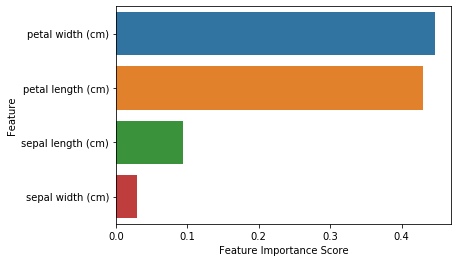

In [45]:
sns.barplot(feature_imp,feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

#### Dropping the sepal width

In [54]:
from sklearn.model_selection import train_test_split


In [61]:
df =df.rename(columns={0:'sepal length',1:'sepal width ',2:'petal length ',3:'petal width'})

In [69]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
X1 = df.drop(['sepal width ','target'],axis=1)
y1=df.target

In [83]:
X1.head()

,sepal length,petal length,petal width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [81]:
X_train , X_test, y_train, y_test = train_test_split(X1,y1,test_size=.3)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
